In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_context('talk')
plt.rc('figure', figsize=(12, 8))

In [5]:
bib = pd.read_csv('filtered_fiction_metadata.csv.gz', compression='gzip')
bib.head()

,docid,volid,recordid,author,firstname,inferreddate,birthdate,authgender,enumcron,title
0,3486,ucm.5320307018,NaN,NaN,NaN,1800,NaN,m,NaN,"Tales, anecdotes, and letters"
1,13137,hvd.hn2he3,NaN,"Kendall, Edward Augustus,",NaN,1800,NaN,m,NaN,"The stories of Senex, or, Little histories of ..."
2,1783,uc2.ark+=13960=t0vq2tk41,NaN,"Wordboise, Emma Jane.",NaN,1800,NaN,f,NaN,Lady Clarissa
3,14101,nyp.33433074913272,NaN,"Hervey, Elizabeth,",NaN,1800,NaN,f,v. 2,The Mourtray family
4,13202,nyp.33433074955018,NaN,"Lathom, Francis,",NaN,1800,NaN,m,v. 3,Men and manners


In [6]:
print(bib.shape, bib.docid.nunique(), bib.volid.nunique())

(93708, 10) 89024 93708


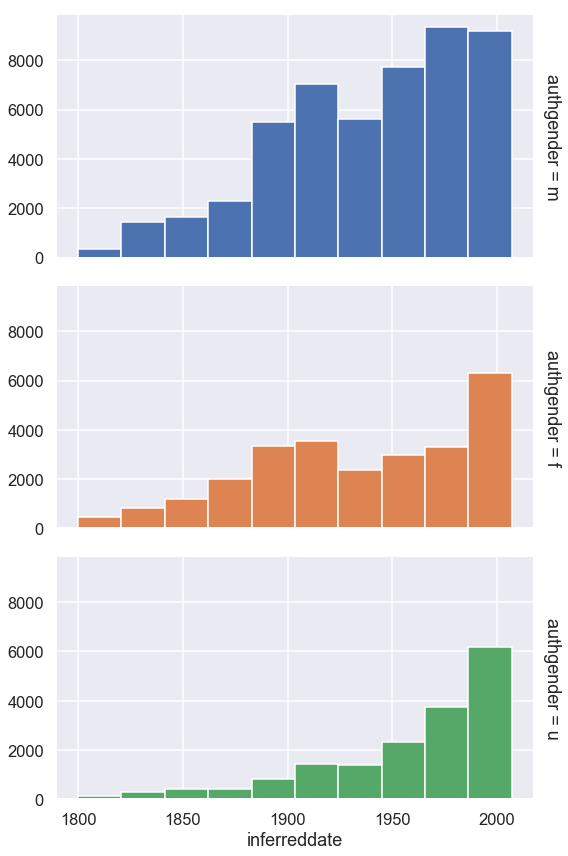

In [13]:
fig = sns.FacetGrid(
    bib, 
    row='authgender',    
    hue='authgender', 
    margin_titles=True,
    height=4,
    aspect=2
)
fig.map(plt.hist, "inferreddate");

In [14]:
g = bib.groupby(['inferreddate'])

In [15]:
dates = []
ratios = []
vols = []
for year, group in g:
    dates.append(int(year))
    m = group.loc[group.authgender=='m'].docid.count()
    f = group.loc[group.authgender=='f'].docid.count()
    vols.append(group.docid.count())
    ratios.append(f/(f+m))

In [16]:
rat = pd.DataFrame([dates, ratios, vols]).T
rat.columns = ['year', 'fem', 'vols']
rat.head()

,year,fem,vols
0,1800.0,0.608696,24.0
1,1801.0,0.422222,46.0
2,1802.0,0.714286,17.0
3,1803.0,0.500000,31.0
4,1804.0,0.323529,37.0


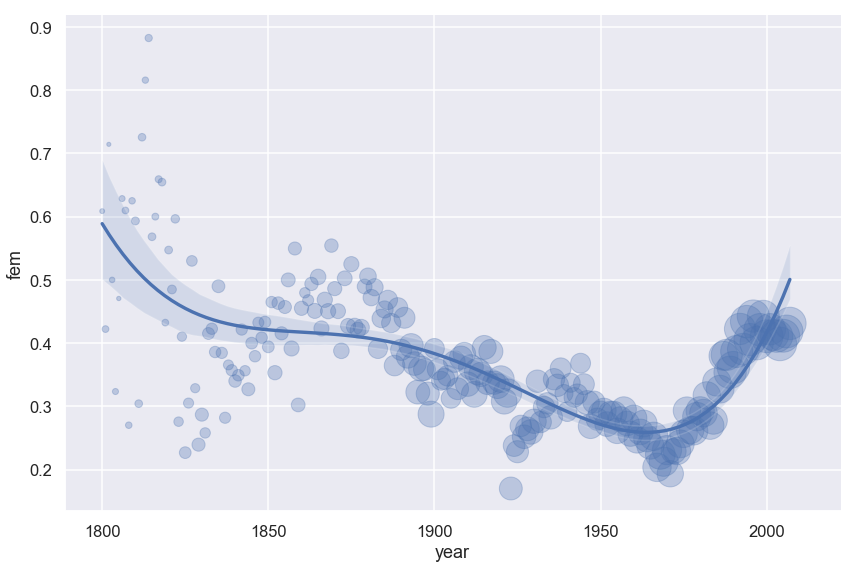

In [22]:
sns.lmplot(x='year', y='fem', 
           scatter_kws={'s':list(rat.vols), 'alpha':0.3}, 
           order=4,
           #lowess=True,
           truncate=True,
           height=8,
           aspect=1.5,
           data=rat);